In [5]:
import sys
import numpy as np
import pandas as pd
import csv
import keras

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [13]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD,Adam
from keras.utils import np_utils
from keras.datasets import mnist

In [14]:
mnist = input_data.read_data_sets('mnist',one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist\t10k-labels-idx1-ubyte.gz


MNIST数据集的个数
 >>>train_nums=55000 
 >>>validation_nums=5000 
 >>>test_nums=10000 

>>>训练集数据大小： (55000, 784) 
 >>>一副图像的大小： (784,)
>>>训练集标签数组大小： (55000, 10) 
 >>>一副图像的标签大小： (10,) 
 >>>一副图像的标签值： [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
使用mnist.train.next_batch(batch_size)批量读取样本

>>>批量读取100个样本:数据集大小= (100, 784) 
 >>>批量读取100个样本:标签集大小= (100, 10)


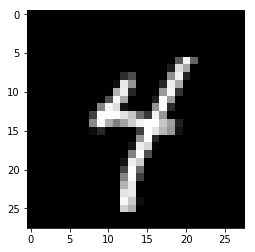

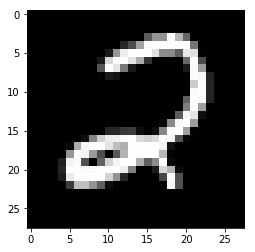

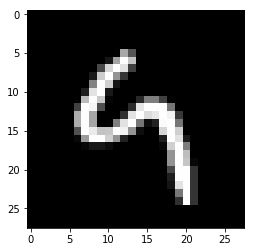

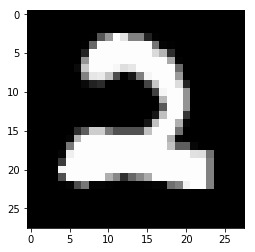

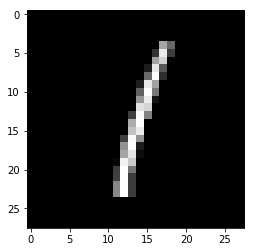

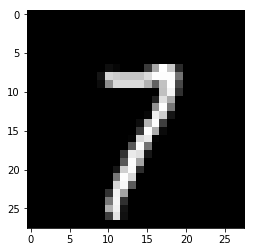

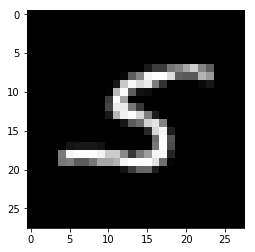

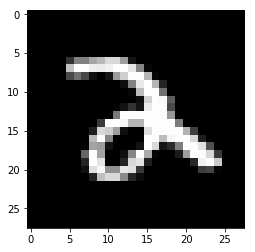

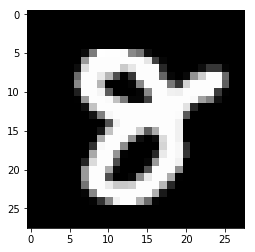

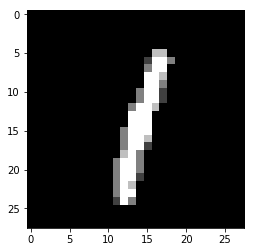

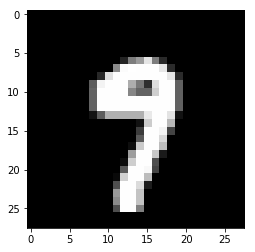

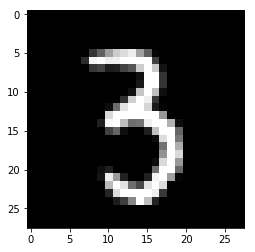

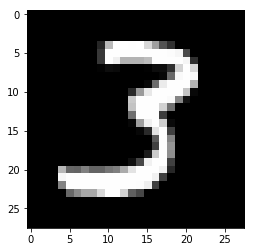

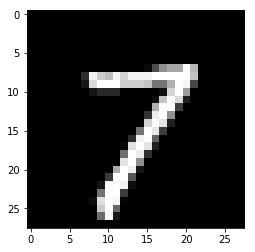

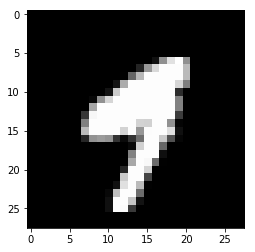

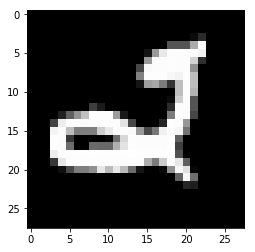

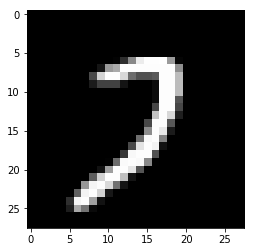

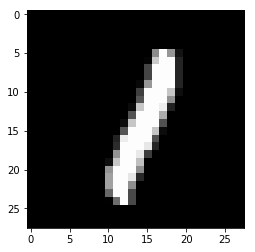

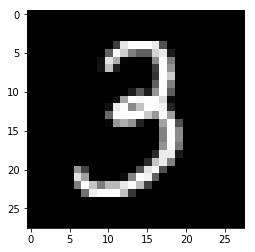

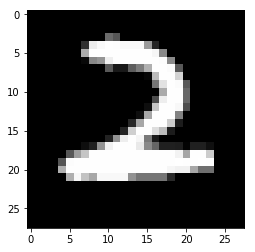

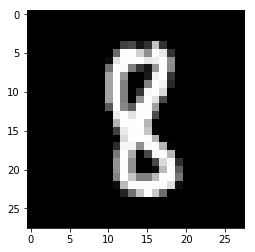

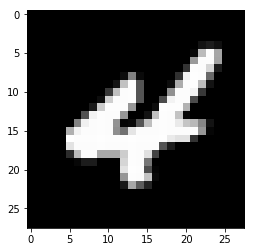

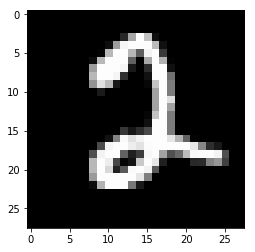

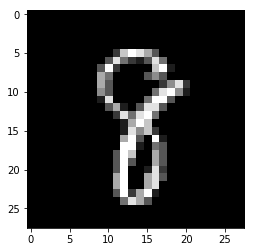

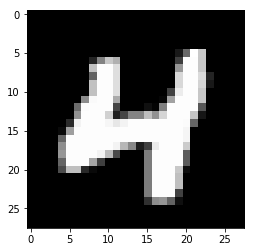

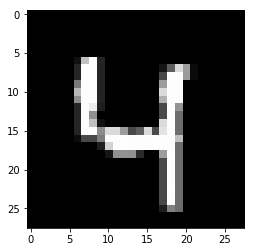

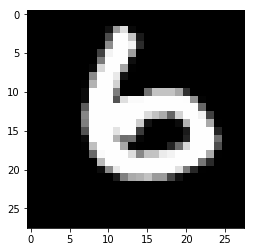

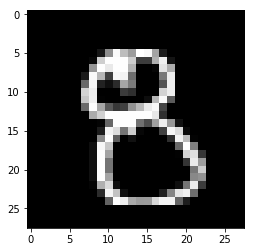

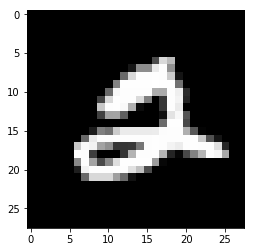

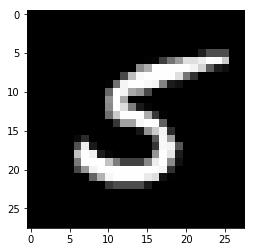

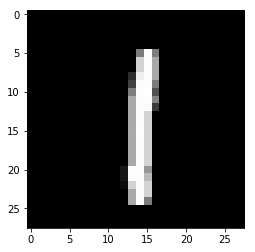

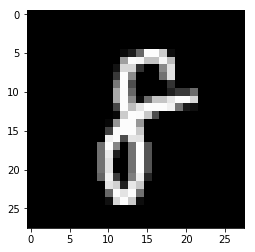

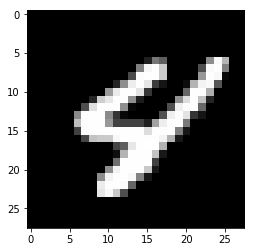

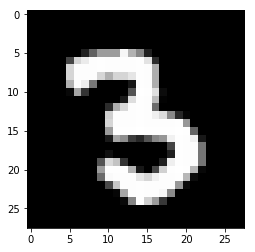

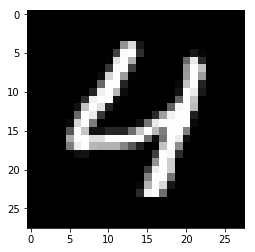

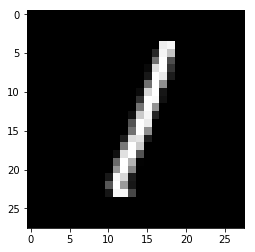

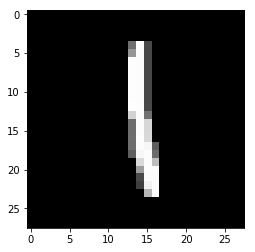

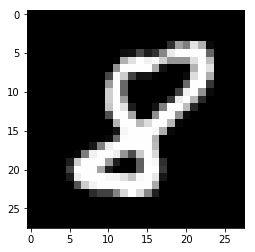

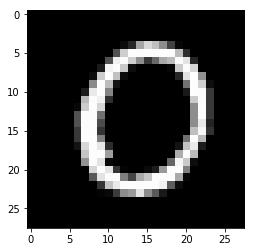

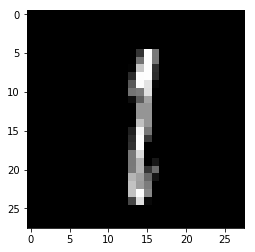

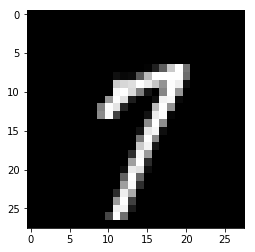

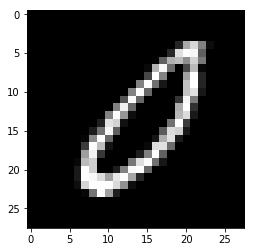

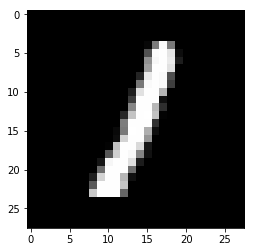

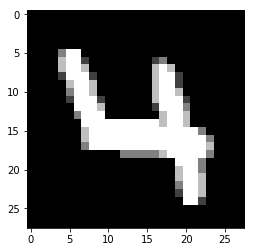

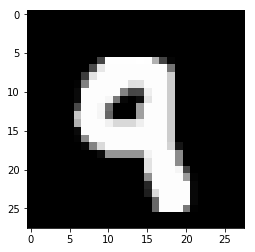

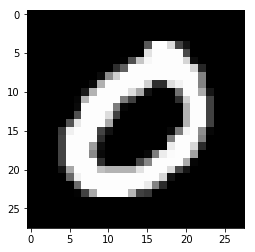

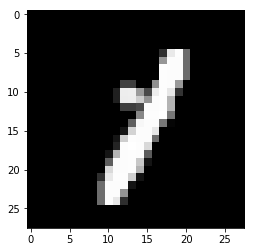

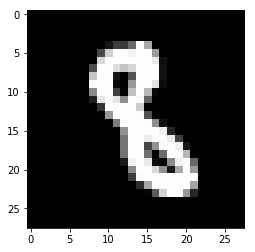

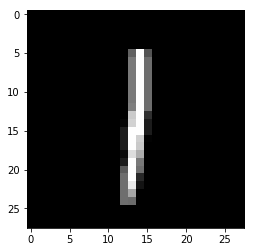

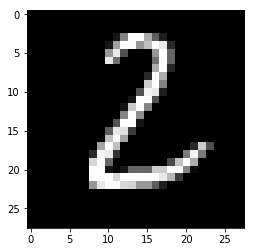

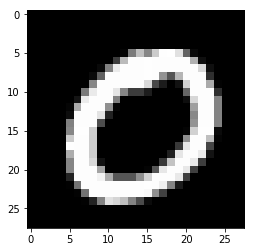

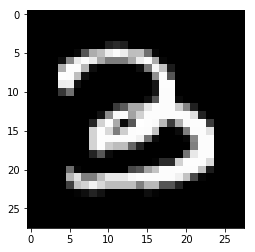

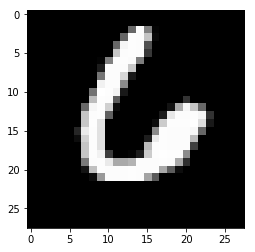

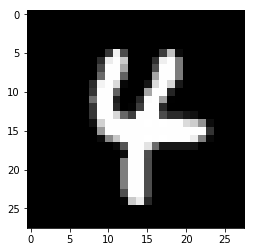

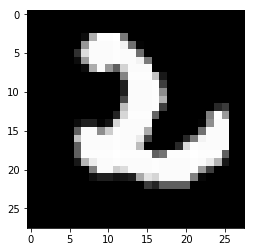

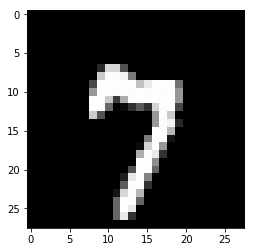

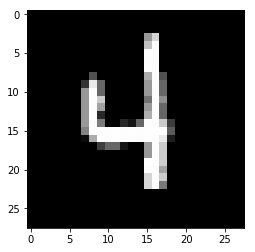

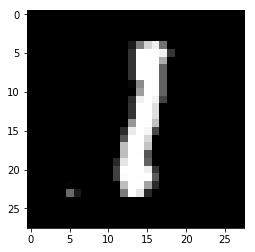

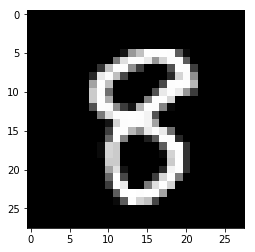

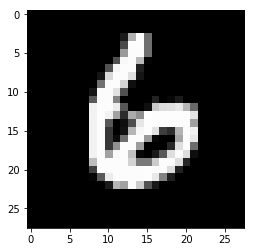

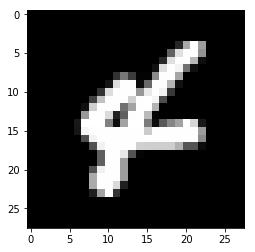

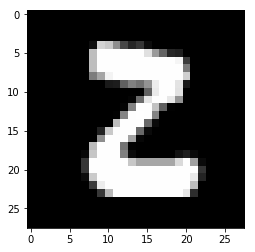

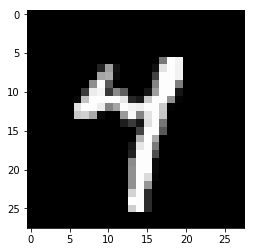

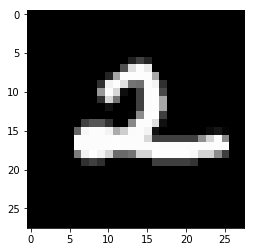

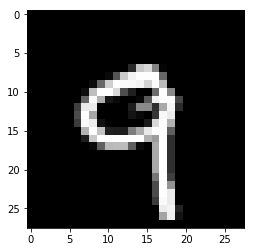

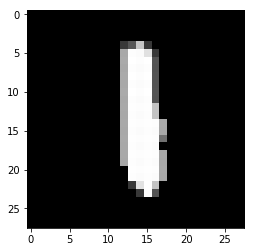

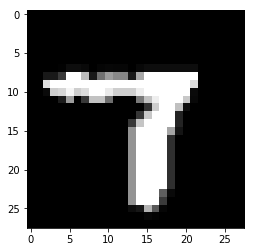

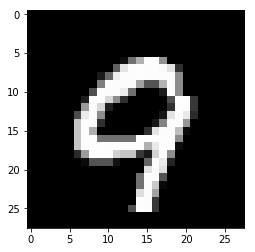

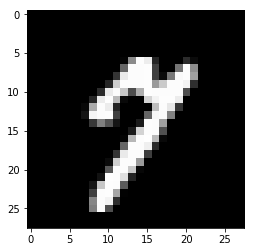

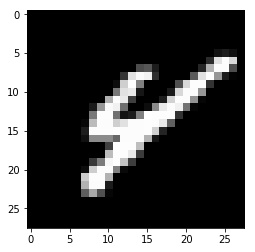

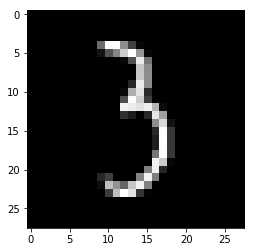

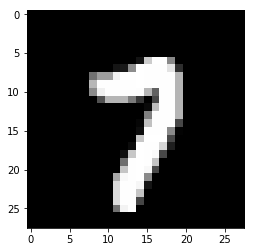

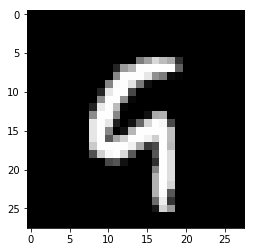

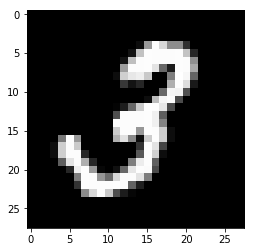

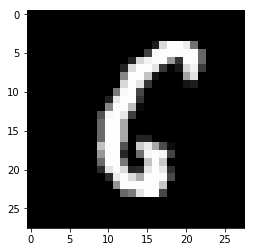

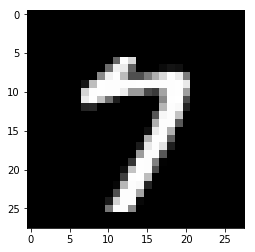

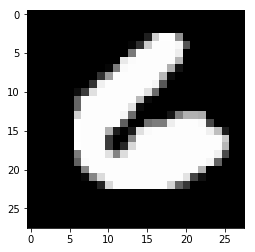

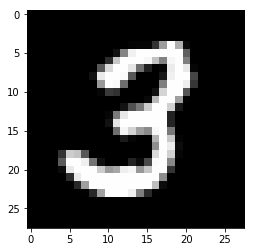

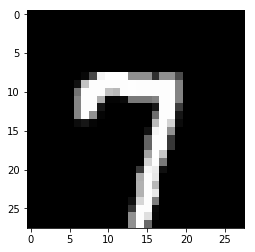

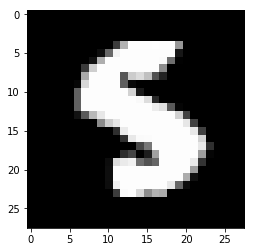

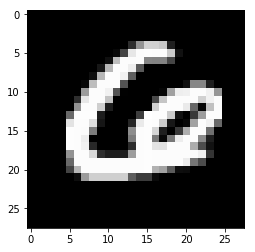

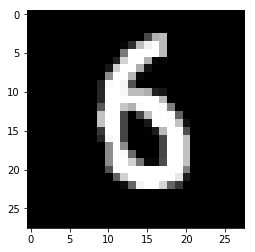

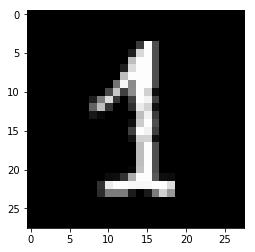

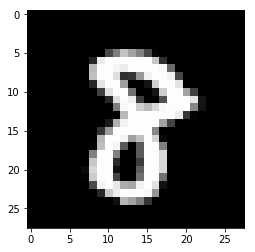

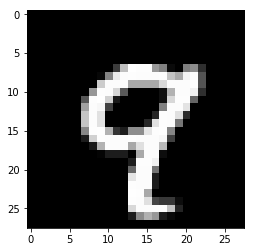

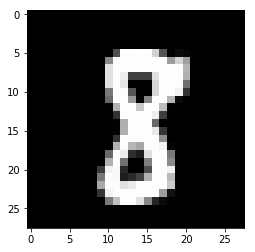

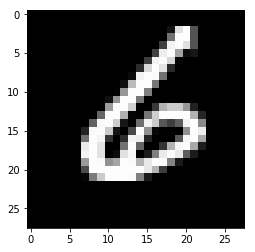

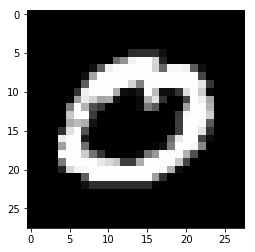

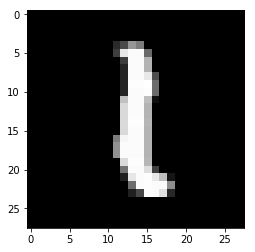

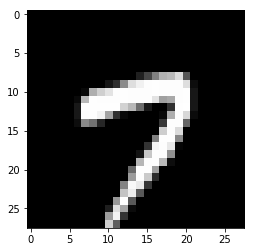

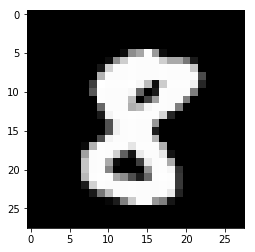

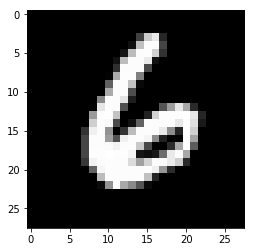

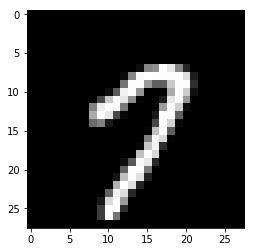

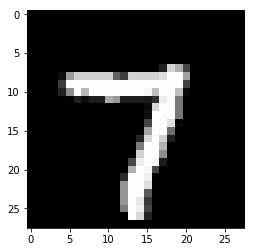

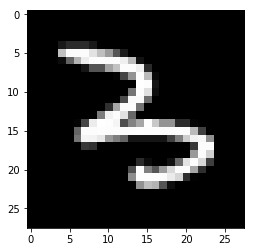

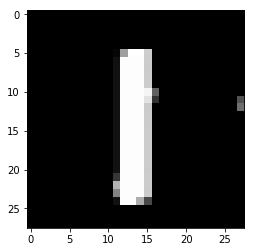

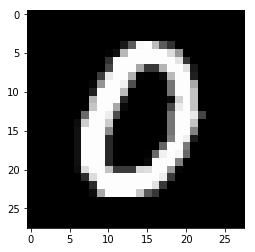

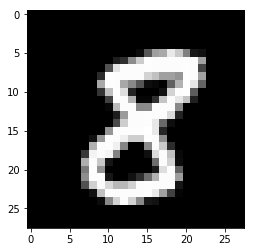

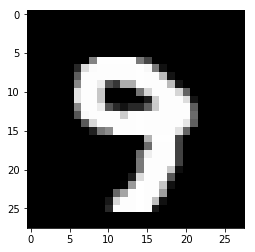

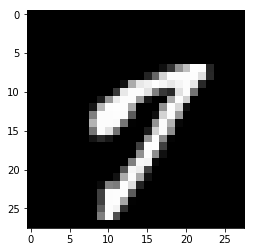

In [16]:
train_nums = mnist.train.num_examples
validation_nums = mnist.validation.num_examples
test_nums = mnist.test.num_examples
print('MNIST数据集的个数')
print(' >>>train_nums=%d' % train_nums,'\n',
      '>>>validation_nums=%d'% validation_nums,'\n',
      '>>>test_nums=%d' % test_nums,'\n')

'''2)获得数据值'''
train_data = mnist.train.images   #所有训练数据
val_data = mnist.validation.images  #(5000,784)
test_data = mnist.test.images       #(10000,784)
print('>>>训练集数据大小：',train_data.shape,'\n',
      '>>>一副图像的大小：',train_data[0].shape)
'''3)获取标签值label=[0,0,...,0,1],是一个1*10的向量'''
train_labels = mnist.train.labels     #(55000,10)
val_labels = mnist.validation.labels  #(5000,10)
test_labels = mnist.test.labels       #(10000,10)

print('>>>训练集标签数组大小：',train_labels.shape,'\n',
      '>>>一副图像的标签大小：',train_labels[1].shape,'\n',
      '>>>一副图像的标签值：',train_labels[0])

'''4)批量获取数据和标签【使用next_batch(batch_size)】'''
batch_size = 100    #每次批量训练100幅图像
batch_xs,batch_ys = mnist.train.next_batch(batch_size)
print('使用mnist.train.next_batch(batch_size)批量读取样本\n')
print('>>>批量读取100个样本:数据集大小=',batch_xs.shape,'\n',
      '>>>批量读取100个样本:标签集大小=',batch_ys.shape)
#xs是图像数据(100,784);ys是标签(100,10)

'''5)显示图像'''
plt.figure()
for i in range(100):
    im = train_data[i].reshape(28,28)
    im = batch_xs[i].reshape(28,28)
    plt.imshow(im,'gray')
    plt.pause(0.0000001)
plt.show()

In [26]:
train_data.shape

(55000, 784)

In [31]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [57]:
model = Sequential()
model.add(Dense(input_dim=28*28,units=633,activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(units=633,activation='relu'))
model.add(Dropout(0.7))
#for i in range(10):
#    model.add(Dense(units=633,activation='relu'))
model.add(Dense(units=633,activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(units=10,activation='softmax'))

#model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.1),metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_data,train_labels,batch_size=100,epochs=20)
result = model.evaluate(train_data,train_labels)
print ('\nTest Acc:', result[1])

Epoch 1/20
55000/55000 [==============================] - 4s 74us/step - loss: 0.7109 - acc: 0.7702
Epoch 2/20
55000/55000 [==============================] - 4s 71us/step - loss: 0.3296 - acc: 0.9048
Epoch 3/20
55000/55000 [==============================] - 4s 65us/step - loss: 0.2754 - acc: 0.9233
Epoch 4/20
55000/55000 [==============================] - 4s 64us/step - loss: 0.2450 - acc: 0.9312
Epoch 5/20
55000/55000 [==============================] - 4s 72us/step - loss: 0.2288 - acc: 0.9364
Epoch 6/20
55000/55000 [==============================] - 4s 77us/step - loss: 0.2184 - acc: 0.9390
Epoch 7/20
55000/55000 [==============================] - 4s 64us/step - loss: 0.2116 - acc: 0.9419
Epoch 8/20
55000/55000 [==============================] - 3s 62us/step - loss: 0.1963 - acc: 0.9462
Epoch 9/20
55000/55000 [==============================] - 4s 65us/step - loss: 0.1920 - acc: 0.9473
Epoch 10/20
55000/55000 [==============================] - 4s 64us/step - loss: 0.1872 - acc: 0.9490

In [58]:
result = model.evaluate(test_data,test_labels)
print ('\nTest Acc:', result[1])

10000/10000 [==============================] - 1s 65us/step

Test Acc: 0.9777
